<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Machine_Learning/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb**

1. Baseline

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [105]:
# 데이터 셋 불러오기
url = 'https://raw.githubusercontent.com/HWMV/AIFFEL_Quest1/master/Machine_Learning/AB_NYC_2019.csv'
dataset = pd.read_csv(url)

# 가격 예측이니가 price를 타겟 컬럼
x = dataset.drop('price',axis=1)
y = dataset['price']

# 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

# price 컬럼이 없으니까 추가
x_train['price'] = y_train
x_test['price'] = y_test

2. EDA(탐색적 데이터 분석)

In [106]:
# 데이터 크기 확인
x_train.shape, x_test.shape

((39116, 16), (9779, 16))

In [107]:
# 데이터 샘플
display(x_train.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,2019-03-23,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,2019-06-27,4.67,1,42,104


In [108]:
# 데이터 샘플
display(x_test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
42776,33216329,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76453,-73.98035,Private room,1,0,NaN,NaN,8,0,250
30338,23453013,Studio Near Times Square,2416454,Gen,Manhattan,Hell's Kitchen,40.76000,-73.98962,Entire home/apt,3,4,2018-07-28,0.26,1,0,175


In [109]:
# 데이터 타입
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 34718 to 22041
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31103 non-null  object 
 12  reviews_per_month           

In [110]:
# 결측치 확인(train) :0이 아닌 것은 그만큼 결측치가 안 채워져 있다는 것
x_train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           16
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       8013
reviews_per_month                 8013
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [111]:
# 결측치 (test): 0이 아닌 것은 그만큼 결측치가 안 채워져 있다는 것
x_test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2039
reviews_per_month                 2039
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

<Axes: >

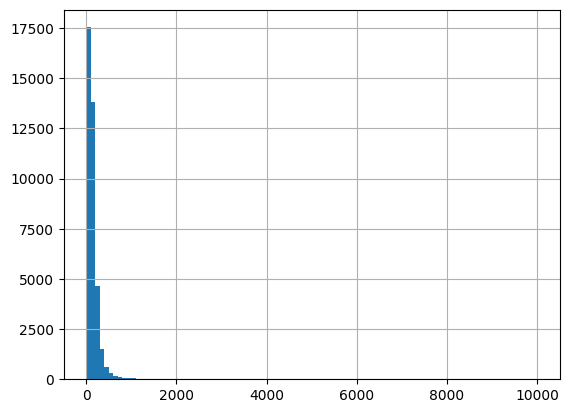

In [112]:
# target(hist)
x_train['price'].hist(bins=100)
# y_train.hist(bins=50)

In [113]:
# target(describe)

x_train['price'].describe()

count    39116.000000
mean       152.583930
std        241.157264
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [114]:
# 피처 (host_id)
x_train['host_id'].value_counts()

219517861    258
107434423    177
30283594      96
12243051      82
137358866     81
            ... 
14210435       1
262883761      1
20319948       1
211941129      1
120906241      1
Name: host_id, Length: 30890, dtype: int64

**데이터 전처리**

In [118]:
# 샘플 확인
display(x_train.head(3))

# 필요없는 컬럼들 삭제
x_train = x_train.drop('last_review', axis=1)
x_test = x_test.drop('last_review', axis=1)

# 샘플 확인
display(x_train.head(30))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,2019-03-23,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,2019-06-27,4.67,1,42,104
37841,29955544,Magnificent Loft with a Skyline view,4538731,Francois,Brooklyn,Greenpoint,40.73039,-73.95434,Entire home/apt,7,2,2019-04-15,0.32,1,20,270


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,4.67,1,42,104
37841,29955544,Magnificent Loft with a Skyline view,4538731,Francois,Brooklyn,Greenpoint,40.73039,-73.95434,Entire home/apt,7,2,0.32,1,20,270
41812,32511315,Summer Rental on Park Ave (1 Month minimum),850498,Aaron,Manhattan,Upper East Side,40.78028,-73.95528,Entire home/apt,30,0,0.00,1,62,149
3939,2451438,Quiet & private room in luxury doorman bldg,10193030,Kaori,Manhattan,Harlem,40.82349,-73.94193,Private room,3,3,0.05,2,178,80
5538,4026150,"Personal, Private and Pretty NYC Apartment",16514175,Karen,Queens,Elmhurst,40.74561,-73.88514,Entire home/apt,2,133,2.26,5,107,78
26917,21322272,Comfy room steps away from Williamsburg nightlife,154339771,Chris,Brooklyn,Williamsburg,40.71258,-73.95742,Private room,2,10,0.50,1,0,50
34205,27133123,"Downtown, 1 Bedroom with living room + sofa bed",42991956,Ashley,Manhattan,Lower East Side,40.71936,-73.99229,Entire home/apt,5,22,2.19,1,40,137
45809,34964114,Cute Nest in the Heart of Bushwick artist hood,54618020,Sophie,Brooklyn,Bushwick,40.70267,-73.92271,Private room,2,1,0.70,1,62,80
26136,20844601,Ocean Room at Great Location,137264725,Gulcin,Manhattan,Chinatown,40.71364,-73.99153,Private room,1,42,1.91,4,257,50


In [119]:
# 결측치 채우기 (Nah 0으로 채우기)
x_train['reviews_per_month'] = x_train['reviews_per_month'].fillna(0)
x_test['reviews_per_month'] = x_test['reviews_per_month'].fillna(0)

In [120]:
# 결측치 재확인
x_train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [121]:
# 가격 값 복사 ? 이건 왜하지?
target = x_train['price']
x_train = x_train.drop('price', axis=1)

In [125]:
# 수치형 피처들 확인
x_train.info

<bound method DataFrame.info of              id                                              name    host_id  \
34718  27528935                          Private Room in Brooklyn  193502084   
4046    2563611                                       Apartment 6    1163315   
37841  29955544              Magnificent Loft with a Skyline view    4538731   
41812  32511315       Summer Rental on Park Ave (1 Month minimum)     850498   
3939    2451438       Quiet & private room in luxury doorman bldg   10193030   
...         ...                                               ...        ...   
39427  30733692                                     Available Now  230028797   
38620  30358423      Cozy Room in Great APT! Near LGA / Manhattan  137358866   
38817  30395433  Gorgeous NYC apt.  near everything! (Women only)   27698539   
47558  35803121     Private room with a sofa bed in Greenpoint BK  138150256   
22041  17731370           Spacious Apartment Near Yankee Stadium.  120906241   

       

In [ ]:
# 이건 연구좀 해보자..
# 수치형 피처 선택
# 수치형만 담을순 없나? 리스트 말고
# cols = x_train.columns[x_train.dtype.isin(['int64','float64'])]
# feature name이 필요한거니까 cols_feature_names = x_train[cols]
# cols = [
#     'host_id',
#     ''
# ]